<a href="https://colab.research.google.com/github/sujataprasad01/DL-Sentimental-Analysis-using-Natural-Language-Processing/blob/main/Sentimental_Analysis_using_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
!pip install wordcloud

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLTK

import nltk
from nltk.corpus import stopwords

# Wordcloud

from wordcloud import wordcloud

nltk.download('stopwords')
nltk.download('wordnet')

# Sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Evalution Metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
!pip install scikit-plot

In [4]:
from scikitplot.metrics import plot_confusion_matrix

# Import the dataset

In [ ]:
https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=train.txt

In [5]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.txt.zip', delimiter=';', names=['text', 'label'])
df_val=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/val.txt' , delimiter=';', names=['text', 'label'])

In [ ]:
df_train

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [7]:
df=pd.concat([df_train, df_val])
df.reset_index(inplace=True, drop=True)

In [8]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [9]:
df.shape

(18000, 2)

In [10]:
df.sample(5)

,text,label
3528,i kept my heart open and exposed while watchin...,sadness
916,i feel lethargic and lazy and completely uncom...,sadness
2194,i can feel what hes feeling but not quite beca...,joy
7557,i feel so clever recent comments a href http www,joy
13525,i was feeling pretty bitchy and horrible but d...,anger


In [11]:
df.label.value_counts()

joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64

<Axes: >

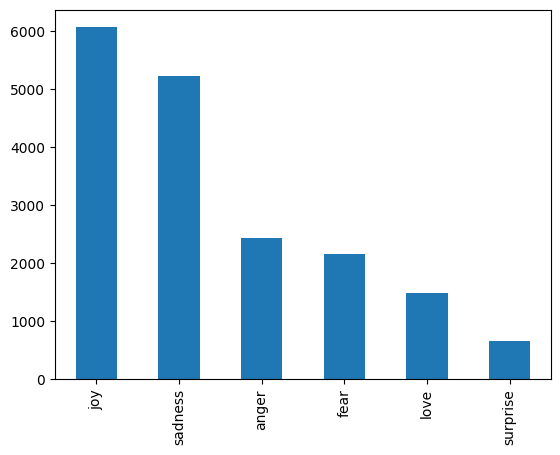

In [16]:
df.label.value_counts().plot.bar()

In [18]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [20]:
df.label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [23]:
df.label.replace(to_replace=['joy', 'love', 'surprise'], value=1, inplace=True)
df.label.replace(to_replace=['sadness', 'anger', 'fear'], value=0, inplace=True)

In [24]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0


In [25]:
df.label.value_counts()

0    9799
1    8201
Name: label, dtype: int64

<Axes: >

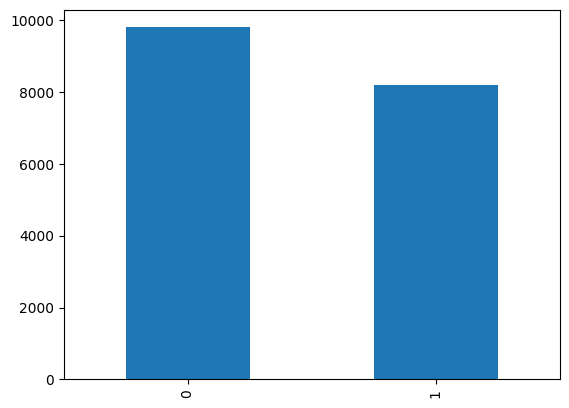

In [26]:
df.label.value_counts().plot.bar()

# Preprocsessing

In [30]:
lm=nltk.WordNetLemmatizer()

In [28]:
def transformation(df_columns):
  new_text=[]
  for i in df.text:
   li=re.sub('0-9',' ', i)
   li=new_text.lower()
   li=new_text.split()
   li=[lm.lemmatize(j) for j in new_text if j not in set(stopwords.words('english'))]
   new_text.append(' '.join(str(k) for k in li))

  return new_text

In [ ]:
var=transformation(df.text)

In [29]:
new_text

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [ ]:
from keras.models import Sequential
from keras.n